In [1]:
import requests
import json
import zlib

In [2]:
url = "http://127.0.0.1:8000/v2/models/pipeline/infer"

In [78]:
prompt = 'jpop'

In [79]:
message = {
  "inputs": [
    {
      "name": "start_text",
      "datatype": "BYTES",
      "shape": [1],
      "data": [prompt]
    },
    {
      "name": "start_text_seed",
      "datatype": "INT32",
      "shape": [1],
      "data": [30]
    },
    {
      "name": "start_guidance",
      "datatype": "FP32",
      "shape": [1],
      "data": [7.5]
    },
    {
      "name": "end_text",
      "datatype": "BYTES",
      "shape": [1],
      "data": [prompt]
    },
    {
      "name": "end_text_seed",
      "datatype": "INT32",
      "shape": [1],
      "data": [23]
    },
    {
      "name": "end_guidance",
      "datatype": "FP32",
      "shape": [1],
      "data": [7.5]
    },
    {
      "name": "negative_prompt",
      "datatype": "BYTES",
      "shape": [1],
      "data": [" "]
    },
    {
      "name": "img_path",
      "datatype": "BYTES",
      "shape": [1],
      "data": ["None"]
    },
    {
      "name": "alpha",
      "datatype": "FP32",
      "shape": [1],
      "data": [0.5]
    },
    {
      "name": "num_inference_steps",
      "datatype": "INT32",
      "shape": [1],
      "data": [50]
    },
   {
     "name": "width",
      "datatype": "INT32",
      "shape": [1],
      "data": [512]
   },
   {
     "name": "num_images_per_prompt",
      "datatype": "INT32",
      "shape": [1],
      "data": [1]
   }
  ]
}

In [80]:
session = requests.Session()
bytes_message = bytes(json.dumps(message), encoding="raw_unicode_escape")
request_body = zlib.compress(bytes_message)

In [81]:
response = session.post(
        url,
        data=request_body,
        headers={
            "Content-Encoding": "gzip",
            "Accept-Encoding": "gzip",
            "Inference-Header-Content-Length": str(len(bytes_message)),
        },
    )

In [82]:
response.status_code

200

In [83]:
json_response = response.json()
outputs = json_response['outputs']

In [84]:
json_response

{'model_name': 'pipeline',
 'model_version': '1',
 'outputs': [{'name': 'output__0',
   'datatype': 'FP32',
   'shape': [1, 512, 512, 3],
   'data': [0.7998046875,
    0.799560546875,
    0.793212890625,
    0.810546875,
    0.811767578125,
    0.8232421875,
    0.81884765625,
    0.821044921875,
    0.83544921875,
    0.83740234375,
    0.846435546875,
    0.8427734375,
    0.84521484375,
    0.859375,
    0.85546875,
    0.845458984375,
    0.864501953125,
    0.85400390625,
    0.7235107421875,
    0.7467041015625,
    0.7490234375,
    0.455230712890625,
    0.454376220703125,
    0.44970703125,
    0.28125,
    0.277587890625,
    0.25634765625,
    0.28076171875,
    0.2884521484375,
    0.271240234375,
    0.3004150390625,
    0.3094482421875,
    0.298828125,
    0.3291015625,
    0.3299560546875,
    0.3330078125,
    0.3212890625,
    0.3211669921875,
    0.320556640625,
    0.34423828125,
    0.3453369140625,
    0.3466796875,
    0.3695068359375,
    0.37353515625,
    0.36

In [85]:
import numpy as np
from PIL import Image
images = np.array(outputs[0]['data'])
images = np.reshape(images, outputs[0]['shape'])

In [86]:
images.shape

(1, 512, 512, 3)

In [87]:
slice56 = images.squeeze(0)
formatted = (slice56 * 255 / np.max(slice56)).astype('uint8')
img = Image.fromarray(formatted)


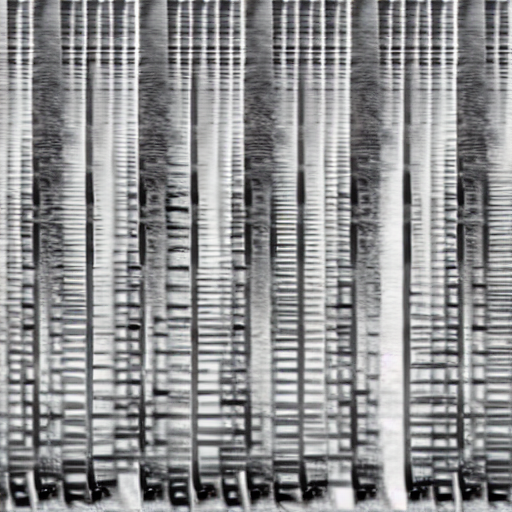

In [88]:
img

In [89]:
image_to_audio(image = img, audio='/home/maler2/daewoong_triton/onnx_jpop.wav')

Wrote /home/maler2/daewoong_triton/onnx_jpop.wav (5.11 seconds)


In [91]:
img = Image.open('/home/maler2/daewoong_triton/jpop_.png')
image_to_audio(image = img, audio='/home/maler2/daewoong_triton/origin_jpop_.wav')

Wrote /home/maler2/daewoong_triton/origin_jpop_.wav (5.11 seconds)


In [19]:
from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_params import SpectrogramParams
from riffusion.util import image_util
from pathlib import Path
def image_to_audio(*, image, audio: str, device: str = "cuda"):
    """
    Reconstruct an audio clip from a spectrogram image.
    """

    # Get parameters from image exif
    img_exif = image.getexif()
    assert img_exif is not None

    try:
        params = SpectrogramParams.from_exif(exif=img_exif)
    except (KeyError, AttributeError):
        print("WARNING: Could not find spectrogram parameters in exif data. Using defaults.")
        params = SpectrogramParams()

    converter = SpectrogramImageConverter(params=params, device=device)
    segment = converter.audio_from_spectrogram_image(image)

    extension = Path(audio).suffix[1:]
    segment.export(audio, format=extension)

    print(f"Wrote {audio} ({segment.duration_seconds:.2f} seconds)")

/home/maler2/anaconda3/envs/riffusion/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/home/maler2/anaconda3/envs/riffusion/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
